# **HOMEWORK 1 - Machine Learning**
*Denise Landini - 1938388*

# **Import needed libraries**

In [41]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import *
import matplotlib.pyplot as pl
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

from google.colab import drive

# **Load data**

In [42]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%ls '/content/drive/My Drive/homework_classification/'

blindtest.json  dataset.json  nodupblindtest.json  noduplicatedataset.json


**Dataset with duplicates**

In [43]:
filename= '/content/drive/My Drive/homework_classification/dataset.json'
db = pd.read_json(filename, lines=True)
print(len(db))

14397


**Dataset without duplicates**

In [4]:
filename= '/content/drive/My Drive/homework_classification/noduplicatedataset.json'
db = pd.read_json(filename, lines=True)
print(len(db))

6073


# **Method 1** 

### Pre-processing 


**Tfidf Vectorizer**

In [5]:
data = db.lista_asm
labels = db.semantic

vectorizer = TfidfVectorizer()

X_all = vectorizer.fit_transform(data)
y_all = labels

### Split Data 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
          test_size=0.2, random_state=15)
print("Train: %d - Test: %d" %(X_train.shape[0],X_test.shape[0]))

Train: 4858 - Test: 1215


## Models 

**Bernoulli NB Model**

In [7]:
start_time = time.time()
model = BernoulliNB()
model.fit(X_train, y_train)
print('Bernoulli Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

Bernoulli Model created
Time: 0.0375 s


**Multinomial NB Model**

In [11]:
start_time = time.time()
model = MultinomialNB()
model.fit(X_train, y_train)
print('Multinomial Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

Multinomial Model created
Time: 0.0417 s


**Random forest classifier**

In [15]:
start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('Random forest classifier created')
print("Time: %s s" % round(time.time() - start_time, 4))

Random forest classifier created
Time: 3.0208 s


**Gaussian NB Model**

In [19]:
model = GaussianNB()
X_train = X_train.toarray()
start_time = time.time()
model.fit(X_train, y_train)
print("Gaussian Model created")
print("Time: %s s" % round(time.time() - start_time, 4))
X_test = X_test.toarray()

Gaussian Model created
Time: 1.7501 s


## Evaluation

**Evaluation test set**

In [20]:
y_pred = model.predict(X_test)

**Confusion matrix**

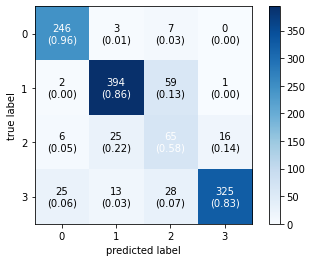

In [21]:
cm= confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                                )

**Classification report**

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  encryption       0.88      0.96      0.92       256
        math       0.91      0.86      0.88       456
        sort       0.41      0.58      0.48       112
      string       0.95      0.83      0.89       391

    accuracy                           0.85      1215
   macro avg       0.79      0.81      0.79      1215
weighted avg       0.87      0.85      0.86      1215



# **Method 2**

## Pre-processing

In [23]:
a = []
for j in db.lista_asm:
  app = j.split("', '")
  for i in range(len(app)):
    if i == 0:
      a.append(app[i].split(" ")[0][2:])
    else:
      a.append(app[i].split(" ")[0])

a = list(set(a))

class_enc = ["and", "or", "xor", "not", "cmp", "test", "jmp", "je", "jne", "jg", "jge", "jl", "jle", 'jbe', 'jb', 'jae', 'ja']
class_sort = ["call", "mov", "lea", "cmp", "jmp", "je", "jne", "jg", "jge", "jl", "jle", 'jbe', 'jb', 'jae', 'ja']
class_math = ["add", "mul", "imul", "div", "cdq", "idiv", "sub", "inc", "dec", "neg"]
for j in a:
  if j[0] == 'f':
    class_math.append(j)
class_str_man = ["mov", "lea", "cmp", "pop", "push", "jmp", "je", "jne", "jg", "jge", "jl", "jle", 'jbe', 'jb', 'jae', 'ja']
loop_names = []
for j in a:
  if j not in class_enc and j not in class_sort and j not in class_math and j not in class_str_man:
    loop_names.append(j)

mat = []
for j in db.lista_asm:
  j_split = j.split("', '")
  row = []

  count = 0
  for i in j_split:
    for label in class_enc:
      if i.find(label) != -1:
        count += 1
        break
  row.append(count)

  count = 0
  for i in j_split:
    for label in class_sort:
      if i.find(label) != -1:
        count += 1
        break
  row.append(count)

  count = 0
  for i in j_split:
    for label in class_math:
      if i.find(label) != -1:
        count += 1
        break
  row.append(count)

  count = 0
  for i in j_split:
    for label in class_str_man:
      if i.find(label) != -1:
        count += 1
        break
  row.append(count)

  count = 0
  for i in j_split:
    for label in loop_names:
      if i.find(label) != -1:
        count += 1
        break
  row.append(count)

  mat.append(row)

print(mat)

[[66, 79, 5, 77, 6], [21, 19, 6, 20, 25], [171, 245, 40, 247, 216], [7, 9, 1, 8, 3], [43, 48, 7, 45, 9], [144, 131, 2, 120, 39], [125, 216, 60, 226, 155], [61, 63, 2, 67, 54], [59, 92, 26, 104, 33], [34, 47, 6, 43, 5], [10, 23, 8, 30, 5], [69, 93, 12, 104, 56], [18, 16, 4, 16, 9], [57, 99, 12, 111, 31], [15, 20, 4, 25, 22], [49, 58, 9, 84, 12], [5, 7, 1, 8, 3], [832, 973, 223, 980, 564], [18, 18, 4, 18, 10], [48, 50, 3, 50, 3], [3, 3, 0, 3, 1], [22, 20, 3, 20, 20], [480, 94, 1, 100, 106], [154, 233, 39, 223, 62], [12, 11, 5, 14, 18], [2787, 3734, 580, 3354, 197], [23, 21, 3, 21, 21], [18, 24, 7, 34, 3], [42, 43, 3, 45, 5], [79, 113, 26, 123, 39], [4, 8, 3, 10, 11], [5, 6, 1, 8, 3], [181, 291, 13, 306, 151], [74, 140, 10, 120, 17], [51, 88, 17, 89, 13], [28, 22, 6, 24, 12], [120, 114, 13, 122, 10], [5, 6, 1, 6, 3], [44, 71, 13, 83, 23], [28, 31, 0, 39, 8], [20, 28, 4, 38, 3], [27, 44, 3, 60, 8], [20, 32, 7, 45, 10], [65, 72, 4, 72, 58], [5, 5, 1, 5, 2], [369, 354, 74, 338, 332], [71, 74

## Split Data

In [24]:
X_all = mat
y_all = db.semantic
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
          test_size=0.2, random_state=15)


## Models

**Bernoulli model**

In [25]:
start_time = time.time()
model1 = BernoulliNB()
model1.fit(X_train, y_train)
print('Bernoulli model created')
print("Time: %s s" % round(time.time() - start_time, 4))

Bernoulli model created
Time: 0.0312 s


**Multinomial model**

In [29]:
start_time = time.time()
model1 = MultinomialNB()
model1.fit(X_train, y_train)
print('Multinomial Model created')
print("Time: %s s" % round(time.time() - start_time, 4))

Multinomial Model created
Time: 0.0352 s


**Random Forest Classifier**

In [33]:
start_time = time.time()
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
print('Random forest classifier created')
print("Time: %s s" % round(time.time() - start_time, 4))

Random forest classifier created
Time: 0.5989 s


**Gaussian Naive Bayes**

In [37]:
start_time = time.time()
model1 = GaussianNB()
model1.fit(X_train, y_train)
print("Gaussian Nb created")
print("Time: %s s" % round(time.time() - start_time, 4))

Gaussian Nb created
Time: 0.0311 s


## Evaluation

**Evaluation test set**

In [38]:
y_pred = model1.predict(X_test)

**Confusion matrix**

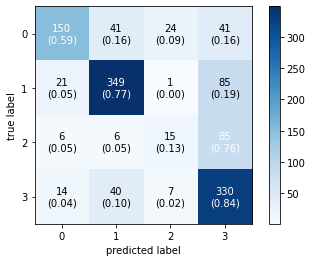

In [39]:
cm= confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                                )

**Classification report**

In [40]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

  encryption       0.79      0.59      0.67       256
        math       0.80      0.77      0.78       456
        sort       0.32      0.13      0.19       112
      string       0.61      0.84      0.71       391

    accuracy                           0.69      1215
   macro avg       0.63      0.58      0.59      1215
weighted avg       0.69      0.69      0.68      1215



# **Blind test**

**Dataset with duplicates**

In [44]:
filename= '/content/drive/My Drive/homework_classification/blindtest.json'
blind = pd.read_json(filename, lines=True)
print(len(blind))

757


In [49]:
data = db.lista_asm
labels = db.semantic

vectorizer = TfidfVectorizer()

X_all = vectorizer.fit_transform(data)
y_all = labels

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
          test_size=0.2, random_state=15)

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

  encryption       0.99      0.76      0.86       558
        math       0.93      0.94      0.93       927
        sort       0.81      0.96      0.88       796
      string       0.94      0.92      0.93       599

    accuracy                           0.90      2880
   macro avg       0.92      0.89      0.90      2880
weighted avg       0.91      0.90      0.90      2880



In [50]:
blind_data = vectorizer.transform(blind.lista_asm)

y_pred = model.predict(blind_data)

f = open("/content/drive/My Drive/Colab Notebooks/1938388.txt", "w")
for pred in y_pred:
  f.write(pred)
  f.write('\n')
f.close()

In [51]:
f = open("/content/drive/My Drive/Colab Notebooks/1938388.txt", "r")
file = f.read()
f.close()
print(file)

encryption
math
string
string
math
string
math
encryption
sort
math
math
math
sort
string
math
math
string
string
math
math
math
string
encryption
math
encryption
string
string
math
math
sort
sort
sort
sort
sort
string
sort
string
math
sort
string
string
math
sort
math
sort
sort
sort
string
string
sort
sort
math
math
string
math
string
math
math
math
math
encryption
sort
math
string
string
sort
math
string
sort
sort
sort
string
string
sort
math
sort
sort
sort
sort
sort
sort
encryption
math
sort
string
math
string
math
sort
math
string
string
string
sort
sort
string
math
encryption
encryption
encryption
math
sort
sort
sort
encryption
math
math
math
math
sort
sort
string
sort
string
string
encryption
math
sort
sort
string
sort
math
math
encryption
math
sort
math
string
sort
encryption
encryption
string
sort
sort
string
sort
math
string
encryption
math
math
sort
math
math
sort
encryption
math
sort
sort
math
math
math
string
string
encryption
string
sort
math
sort
sort
math
sort
math
strin